## [Predict service faults](https://www.kaggle.com/c/telstra-recruiting-network)

[Telstra](https://en.wikipedia.org/wiki/Telstra) -  Australia's largest telecommunications network

![](../images/logo.jpg)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('../input/train.csv.zip', compression='zip')
test = pd.read_csv('../input/test.csv.zip', compression='zip')

event_type = pd.read_csv('../input/event_type.csv.zip', compression='zip')
resource_type = pd.read_csv('../input/resource_type.csv.zip', compression='zip')
severity_type = pd.read_csv('../input/severity_type.csv.zip', compression='zip')
log_feature = pd.read_csv('../input/log_feature.csv.zip', compression='zip')

## Train & Test

In [3]:
print(train.shape, test.shape)
train.head()

(7381, 3) (11171, 2)


,id,location,fault_severity
0,14121,location 118,1
1,9320,location 91,0
2,14394,location 152,1
3,8218,location 931,1
4,14804,location 120,0


In [4]:
print("")
print("Train, unq ID:", train.id.nunique())
print("Train, unq location:", train.location.nunique())
print("")
print("Test, unq ID:", test.id.nunique())
print("Test, unq location:", test.location.nunique())
print("")
print("All unique locations: ",  len(set(train.location) | set(test.location)))
print("New locations (in test): ", len(set(test.location) - set(train.location)))


Train, unq ID: 7381
Train, unq location: 929

Test, unq ID: 11171
Test, unq location: 1039

All unique locations:  1126
New locations (in test):  197


In [5]:
197 * 100 / 1039

18.960538979788257

There're 197 new locations (~20%) in test set. That means, the historical data (train set) have nothing about those locations.

In [6]:
if np.int != train.location.dtype:
    train['location'] = train.location.map(lambda x: x.split(' ')[1]).astype(np.int)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7381 entries, 0 to 7380
Data columns (total 3 columns):
id                7381 non-null int64
location          7381 non-null int64
fault_severity    7381 non-null int64
dtypes: int64(3)
memory usage: 173.1 KB


In [7]:
train.columns

Index(['id', 'location', 'fault_severity'], dtype='object')

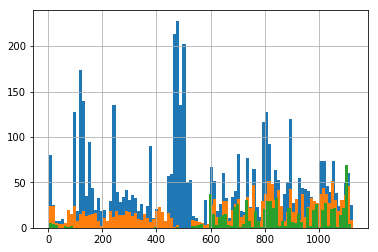

In [8]:
train[ train.fault_severity == 0  ].location.hist(bins=100)
train[ train.fault_severity == 1  ].location.hist(bins=100)
train[ train.fault_severity == 2  ].location.hist(bins=100);

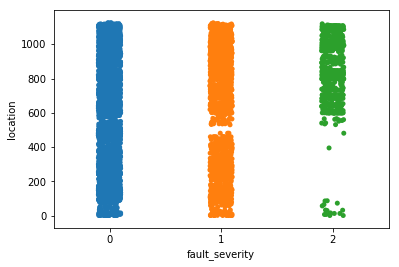

In [9]:
sns.stripplot(x="fault_severity", y="location", data=train, jitter=True)

## Event type

In [10]:
print(event_type.shape)
print("unique ID: ", event_type.id.nunique())
print("unique event_type: ", event_type.event_type.nunique())
event_type.sample(5)

(31170, 2)
unique ID:  18552
unique event_type:  53


,id,event_type
13666,4513,event_type 34
12858,984,event_type 34
19118,2607,event_type 42
8498,18365,event_type 34
22216,9274,event_type 8


In [11]:
event_type.event_type.value_counts(normalize=True).head(15)

event_type 11    0.253064
event_type 35    0.212223
event_type 34    0.190151
event_type 15    0.141001
event_type 20    0.046776
event_type 54    0.021944
event_type 13    0.018672
event_type 42    0.015335
event_type 44    0.014950
event_type 23    0.013763
event_type 14    0.010587
event_type 43    0.009817
event_type 22    0.007154
event_type 50    0.004941
event_type 10    0.004652
Name: event_type, dtype: float64

## Resource type

In [12]:
print(resource_type.shape)
print("unique ID: ", resource_type.id.nunique())
print("unique event_type: ", resource_type.resource_type.nunique())
resource_type.sample(5)

(21076, 2)
unique ID:  18552
unique event_type:  10


,id,resource_type
17518,8389,resource_type 8
863,8316,resource_type 2
341,10110,resource_type 8
10943,17166,resource_type 2
5842,3798,resource_type 2


In [13]:
resource_type[ resource_type.id == 6050]

,id,resource_type
19831,6050,resource_type 8
19832,6050,resource_type 6


In [14]:
resource_type.resource_type.value_counts(normalize=True)

resource_type 8     0.487189
resource_type 2     0.423135
resource_type 6     0.027614
resource_type 7     0.023629
resource_type 4     0.015658
resource_type 9     0.009015
resource_type 3     0.006880
resource_type 10    0.003464
resource_type 1     0.002752
resource_type 5     0.000664
Name: resource_type, dtype: float64

## Severity type

In [15]:
print(severity_type.shape)
print("unique ID: ", severity_type.id.nunique())
print("unique event_type: ", severity_type.severity_type.nunique())
severity_type.sample(5)

(18552, 2)
unique ID:  18552
unique event_type:  5


,id,severity_type
9465,5639,severity_type 2
13870,17993,severity_type 1
8383,17517,severity_type 2
531,484,severity_type 1
11832,18202,severity_type 2


In [16]:
severity_type.severity_type.value_counts(normalize=True)

severity_type 2    0.470947
severity_type 1    0.470461
severity_type 4    0.054657
severity_type 5    0.003504
severity_type 3    0.000431
Name: severity_type, dtype: float64

## Log feature

In [17]:
print(log_feature.shape)
print("unique ID: ", log_feature.id.nunique())
print("unique event_type: ", log_feature.log_feature.nunique())
log_feature.sample(5)

(58671, 3)
unique ID:  18552
unique event_type:  386


,id,log_feature,volume
21477,11223,feature 312,4
50595,5350,feature 219,1
450,10680,feature 201,10
24283,6236,feature 232,1
21174,13389,feature 134,1


In [18]:
log_feature[ log_feature.id == 4831 ]

,id,log_feature,volume
50857,4831,feature 198,3
50858,4831,feature 71,5
50859,4831,feature 193,5
50860,4831,feature 76,2


In [19]:
log_feature.log_feature.value_counts(normalize=True).head(15)

feature 312    0.089772
feature 232    0.081028
feature 82     0.059177
feature 203    0.048116
feature 313    0.036560
feature 233    0.032401
feature 307    0.027220
feature 54     0.026811
feature 170    0.026009
feature 71     0.025805
feature 315    0.025481
feature 134    0.024186
feature 80     0.022771
feature 235    0.022055
feature 193    0.019771
Name: log_feature, dtype: float64

## Location

In [20]:
train.head()

,id,location,fault_severity
0,14121,118,1
1,9320,91,0
2,14394,152,1
3,8218,931,1
4,14804,120,0


## Target variable
**Fault severity** has 3 categories: 
- 0 - meaning no fault
- 1 - meaning only a few 
- 2 - meaning many

In [21]:
train['fault_severity'].value_counts()

0    4784
1    1871
2     726
Name: fault_severity, dtype: int64

In [22]:
train['fault_severity'].value_counts(normalize=True)

0    0.648151
1    0.253489
2    0.098361
Name: fault_severity, dtype: float64

## Success Metric

Log los

In [23]:
severity_type['severity_type'].map(lambda x: x[-1]).astype(np.int8).head()

0    2
1    2
2    2
3    1
4    1
Name: severity_type, dtype: int8

In [24]:
event_type['event_type'].map(lambda x: x[11:]).astype(np.int8).head()
pd.get_dummies(event_type,columns=['event_type']).id.nunique()

18552